<a href="https://colab.research.google.com/github/sgurudut/Item-Sales-Prediction-on-Big-Mart-Sales-Data/blob/main/BigMart_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the pre-processed dataset
data = pd.read_csv('/content/drive/MyDrive/BigMartData/big_mart_preprocessed.csv')
data_test = pd.read_csv('/content/drive/MyDrive/BigMartData/big_mart_test_preprocessed.csv')

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0.0,0.048866,0.000000,0.927507,OUT049,0.583333,0.5,0.0,0.000000,0.283587
1,DRC01,0.081274,1.0,0.058705,0.066667,0.072068,OUT018,1.000000,0.5,1.0,0.333333,0.031419
2,FDN15,0.770765,0.0,0.051037,0.133333,0.468288,OUT049,0.583333,0.5,0.0,0.000000,0.158115
3,FDX07,0.871986,1.0,0.000000,0.200000,0.640093,OUT010,0.541667,0.5,1.0,1.000000,0.053555
4,NCD19,0.260494,0.0,0.000000,0.266667,0.095805,OUT013,0.083333,1.0,1.0,0.000000,0.073651


In [6]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,0.964275,0.0,0.023374,0.400000,0.323413,OUT049,0.583333,0.5,0.0,0.000000
1,FDW14,0.222983,1.0,0.118737,0.000000,0.235849,OUT017,0.916667,0.5,0.5,0.000000
2,NCN55,0.598095,0.0,0.307674,0.933333,0.894140,OUT010,0.541667,0.5,1.0,1.000000
3,FDQ58,0.164335,0.0,0.047548,0.400000,0.524488,OUT017,0.916667,0.5,0.5,0.000000
4,FDY38,0.484706,1.0,0.366458,0.000000,0.862069,OUT027,0.000000,0.5,1.0,0.666667


In [7]:
# checking missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [9]:
# checking the data type
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [10]:
data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
dtype: object

In [11]:
# removing the columns with ID since these are just the unique values
data = data.drop('Item_Identifier', axis=1)
data = data.drop('Outlet_Identifier', axis=1)

In [12]:
data_test = data_test.drop('Item_Identifier', axis=1)
data_test = data_test.drop('Outlet_Identifier', axis=1)

In [13]:
data.shape

(8523, 10)

In [14]:
data_test.shape

(5681, 9)

In [15]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Item_Outlet_Sales', axis=1)

# storing the dependent variable as y
y = data['Item_Outlet_Sales']


In [16]:
data_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
X_test = data_test

In [18]:
# shape of independent and dependent variables
X.shape, y.shape

((8523, 9), (8523,))

In [19]:
X_test.shape

(5681, 9)

In [20]:
# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense

In [21]:
# number of input neurons
X.shape

(8523, 9)

In [22]:
# number of features in the data
X.shape[1]

9

In [23]:
# defining input neurons
input_neurons = X.shape[1]

In [24]:
# define number of output neurons
output_neurons = X_test.shape[0]

In [25]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [26]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [27]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [28]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 5681)              34086     
                                                                 
Total params: 34,241
Trainable params: 34,241
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mean_absolute_error',optimizer='Adam',metrics= [tf.keras.metrics.RootMeanSquaredError()])

In [30]:
model_history = model.fit(X, y, epochs=100, validation_split = 0.2 )

Epoch 1/100
214/214 [==============================] - 3s 10ms/step - loss: 0.0945 - root_mean_squared_error: 0.1320 - val_loss: 0.0779 - val_root_mean_squared_error: 0.1153
Epoch 2/100
214/214 [==============================] - 2s 9ms/step - loss: 0.0726 - root_mean_squared_error: 0.1046 - val_loss: 0.0702 - val_root_mean_squared_error: 0.1035
Epoch 3/100
214/214 [==============================] - 2s 9ms/step - loss: 0.0691 - root_mean_squared_error: 0.0992 - val_loss: 0.0674 - val_root_mean_squared_error: 0.0983
Epoch 4/100
214/214 [==============================] - 2s 10ms/step - loss: 0.0661 - root_mean_squared_error: 0.0948 - val_loss: 0.0643 - val_root_mean_squared_error: 0.0940
Epoch 5/100
214/214 [==============================] - 2s 10ms/step - loss: 0.0634 - root_mean_squared_error: 0.0908 - val_loss: 0.0621 - val_root_mean_squared_error: 0.0895
Epoch 6/100
214/214 [==============================] - 2s 7ms/step - loss: 0.0613 - root_mean_squared_error: 0.0876 - val_loss: 0.06

In [31]:
# getting predictions for the validation set
prediction_x = model.predict(X_test)
classes_x = np.argmax(prediction_x, axis = 1)

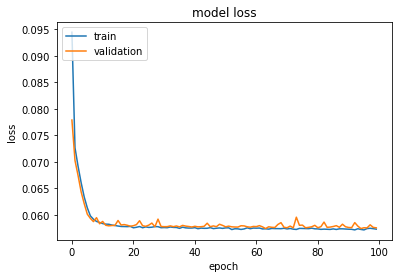

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
print(prediction_x)

[[0.11895184 0.11889488 0.11902224 ... 0.11870024 0.11896607 0.11877438]
 [0.09535778 0.0953122  0.09543712 ... 0.09516288 0.09536144 0.09519511]
 [0.03310672 0.03303035 0.03320568 ... 0.03292533 0.03320346 0.03298916]
 ...
 [0.1367756  0.13667555 0.13687223 ... 0.13643445 0.13681573 0.13655089]
 [0.2821521  0.28215742 0.28234586 ... 0.28150278 0.28248248 0.2821631 ]
 [0.08883179 0.08877715 0.0889137  ... 0.08862603 0.0888555  0.08867343]]


In [34]:
print(classes_x)

[4554 4554  454 ... 4526 5569 4554]


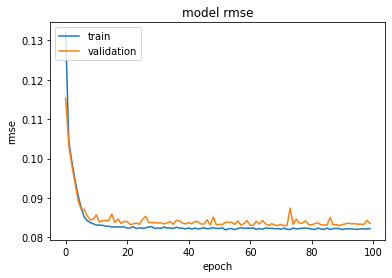

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['root_mean_squared_error'])
plt.plot(model_history.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
data_test.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.0,0.023374,0.400000,0.323413,0.583333,0.5,0.0,0.000000
1,0.222983,1.0,0.118737,0.000000,0.235849,0.916667,0.5,0.5,0.000000
2,0.598095,0.0,0.307674,0.933333,0.894140,0.541667,0.5,1.0,1.000000
3,0.164335,0.0,0.047548,0.400000,0.524488,0.916667,0.5,0.5,0.000000
4,0.484706,1.0,0.366458,0.000000,0.862069,0.000000,0.5,1.0,0.666667


In [37]:
data_test.shape


(5681, 9)

In [38]:
classes_x.shape

(5681,)